In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)

print("Libraries imported.")

Libraries imported.


In [ ]:
try:
    data_path = '../data/train_data.csv'
    df = pd.read_csv(data_path)
    loaded_from = data_path
except FileNotFoundError:
    data_path = '../data/Life_Expectancy.csv'
    df = pd.read_csv(data_path)
    loaded_from = data_path

df.columns = df.columns.str.strip()

print(f"Dataset loaded from {loaded_from}: {df.shape[0]} rows, {df.shape[1]} columns.")
df.head()

Dataset loaded: 2497 rows, 22 columns.


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Hungary,2009,Developed,74.2,162.0,0,11.46,1281.155944,NaN,1,61.1,1,99.0,7.55,99.0,0.1,12967.165430,12265.0,1.8,1.8,0.816,15.3
1,Singapore,2010,Developed,82.0,61.0,0,1.84,4540.543752,96.0,50,31.8,0,96.0,3.96,96.0,0.1,46569.679510,NaN,2.1,2.1,0.889,14.5
2,New Zealand,2008,Developed,81.0,75.0,0,9.49,6761.288966,9.0,0,63.8,0,89.0,1.70,89.0,0.1,31287.778650,NaN,0.3,0.3,0.894,19.5
3,Honduras,2000,Developing,71.0,174.0,6,2.61,28.808311,93.0,0,38.8,8,88.0,6.63,94.0,1.7,188.783165,6524283.0,2.8,2.7,0.551,9.8
4,Egypt,2002,Developing,68.7,177.0,61,0.15,0.000000,97.0,653,51.8,75,97.0,5.97,97.0,0.1,NaN,NaN,3.4,3.4,0.617,11.2


In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2497.000000,2488.000000,2488.000000,2497.000000,2333.000000,2497.000000,2016.000000,2497.000000,2466.000000,2497.000000,2481.000000,2306.000000,2481.000000,2497.000000,2132.000000,1.957000e+03,2466.000000,2466.000000,2356.000000,2360.000000
mean,2007.479375,69.143770,164.647508,28.987185,4.577008,731.548870,81.008433,2431.130156,38.092863,40.258710,82.419589,5.936544,82.240226,1.699199,7348.579392,1.313189e+07,4.818613,4.863058,0.625069,11.959534
std,4.616338,9.517112,124.080010,107.624711,4.056307,1987.075471,25.107816,11740.711517,20.098019,147.252113,23.703581,2.493682,23.914151,4.898429,14143.733665,6.507472e+07,4.375821,4.484728,0.213123,3.380734
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,3.685949,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.200000,74.000000,0.000000,0.850000,5.347718,77.000000,0.000000,19.100000,0.000000,78.000000,4.252500,78.000000,0.100000,458.064238,1.822860e+05,1.600000,1.525000,0.489750,10.100000
50%,2007.000000,72.000000,144.000000,3.000000,3.670000,64.398533,92.000000,17.000000,43.000000,4.000000,93.000000,5.750000,93.000000,0.100000,1683.750332,1.354493e+06,3.300000,3.300000,0.676500,12.300000
75%,2011.000000,75.525000,227.000000,22.000000,7.680000,437.105966,96.000000,383.000000,56.100000,28.000000,97.000000,7.530000,97.000000,0.800000,5858.119655,7.472819e+06,7.200000,7.200000,0.780000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      9
Adult Mortality                      9
infant deaths                        0
Alcohol                            164
percentage expenditure               0
Hepatitis B                        481
Measles                              0
 BMI                                31
under-five deaths                    0
Polio                               16
Total expenditure                  191
Diphtheria                          16
 HIV/AIDS                            0
GDP                                365
Population                         540
 thinness  1-19 years               31
 thinness 5-9 years                 31
Income composition of resources    141
Schooling                          137
dtype: int64

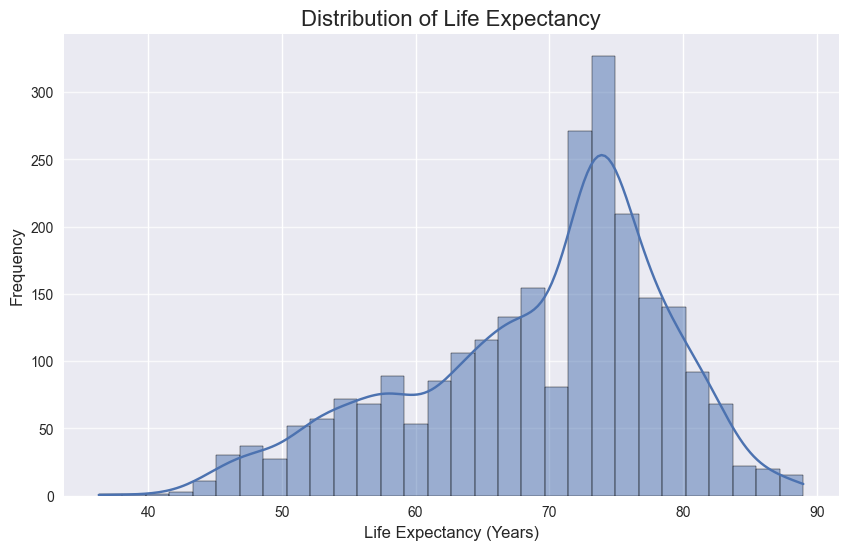

In [ ]:
df.columns = df.columns.str.strip()
df.dropna(subset=['Life expectancy'], inplace=True)
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy'], bins=30, kde=True)
plt.title('Distribution of Life Expectancy', fontsize=16)
plt.xlabel('Life Expectancy (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()